In [1]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 11})

In [2]:
def timespacing_var_to_array(var, dt):
    L = 5e-3
    vars = np.array(['cmts', 'ch2', 'chcl','d','phi','xi'])
#          var_index= 0       1      2      3   4     5
    var_index = var
    which_var = str(vars[var_index])
    
    with open(r'/Users/jjmarzia/Desktop/cvisim/dt_spacing/jul3-dt/'+which_var+'/a1_'+str(dt)+'.txt','r') as file:
        data = file.read().split(' ')
        # print(data)
        i=0
        for i in range(len(data)):
            if '\n' in data[i]:
                data[i] = data[i].replace('\n', '')
            i=i+1
        # print(data)
        data = [i for i in data if i]
        data = np.array(data)
        data = data.astype(float)
    # if var_index == 5:
        return np.linspace(0,L, 28), data, which_var
    # else:
    #     return np.linspace(0,L, dt), data, which_var

In [3]:
def plot_alldt(var):
    fig, ax = plt.subplots(figsize = (5,3), layout='constrained')

    dts = np.array(['0.1', '0.5', '1', '2.5', '5', '7.5', '10', '25', '50', '100'])
    i=0
    for i in range(len(dts)):
        fsol = timespacing_var_to_array(var,dts[i])
        plt.plot(fsol[0], fsol[1],label=str(fsol[2])+' dt '+str(dts[i]))
        i = i+1

    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True)
    # plt.ylim([0,1])

In [4]:
def plot_all_vars():
    plot_alldt(0)
    plt.ylim([0,2])
    plot_alldt(1)
    plt.ylim([0,2])
    plot_alldt(2)
    plt.ylim([0,2])
    plot_alldt(3)
    plt.ylim([0,50e-6])
    plot_alldt(4)
    plt.ylim([0,100e-6])
    plot_alldt(5)
    plt.ylim([0,1])

In [5]:
def fit_points(var, coarsenz, finenz):
    coarse_grid = timespacing_var_to_array(var, coarsenz)
    fine_grid = timespacing_var_to_array(var, finenz)

    c_in_f = np.around(np.linspace(0,finenz-1,coarsenz))
    # print(c_in_f)
    f_c = []
    q=0
    for q in range(len(c_in_f)):
        f_c = np.append(f_c, fine_grid[1][round(c_in_f[q])])
        q+=1
    return f_c

In [6]:
def calc_norm(var, coarsenz, finenz):

    
    coarse_grid = timespacing_var_to_array(var, coarsenz)
    if var==5:
        fine_grid = timespacing_var_to_array(var, finenz)
    else:
        fine_grid = fit_points(var, coarsenz, finenz)
    norm_c_f = np.linalg.norm(fine_grid[1]-coarse_grid[1], np.inf)
    return norm_c_f

In [7]:
def calc_all_norms(var, finenz):
    nzs = np.array([50, 25, 10, 7.5, 5, 2.5, 1, 0.5, 0.1])
    hs = 1/nzs
    n0 = calc_norm(var, nzs[0], finenz)
    n1 = calc_norm(var, nzs[1], finenz)
    n2 = calc_norm(var, nzs[2], finenz)
    n3 = calc_norm(var, nzs[3], finenz)
    n4 = calc_norm(var, nzs[4], finenz)
    n5 = calc_norm(var, nzs[5], finenz)
    n6 = calc_norm(var, nzs[6], finenz)
    n7 = calc_norm(var, nzs[7], finenz)
    n8 = calc_norm(var, nzs[8], finenz)
    norms = np.array([n0, n1, n2, n3, n4, n5, n6, n7, n8])
    norm_slope = (n8-n0)/(hs[len(hs)-1]-hs[0])
    return hs, norms, norm_slope


FileNotFoundError: [Errno 2] No such file or directory: '/Users/jjmarzia/Desktop/cvisim/dt_spacing/jul3-dt/xi/a1_50.0.txt'

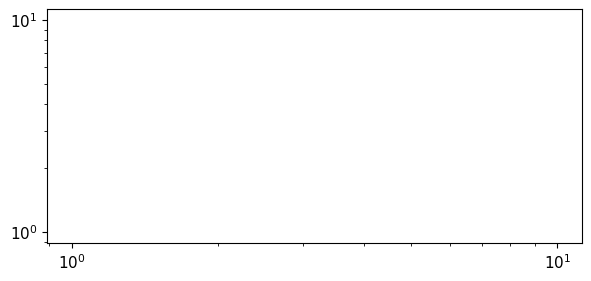

In [8]:
fig, ax = plt.subplots(figsize = (5.8,2.7), layout='constrained')
ax.set_xscale("log")
ax.set_yscale("log")

a = calc_all_norms(5, 0.1)
plt.scatter(a[0],a[1],color='red')
plt.grid(True)
# plt.ylim(1e-4,1e-1)
# plt.xlim(1e-4, 1e-1)

print('norm_slope =',a[2])


# plot_all_grids()

In [ ]:
# plot_all_vars()